<b>Name: Aishwarya Bhavsar</b> <br>
<b>CSULB ID: 029371509 </b><br>
<b>CECS 551 - Assignment 4</b><br>
<b>Design a neural network and test regularization methods using keras library</b>


<b>(b) Design a neural network and implement it.</b>

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers
from google.colab import drive

In [3]:
drive.mount('/content/drive')
data=scipy.io.loadmat('/content/drive/My Drive/data.mat');

Mounted at /content/drive


In [4]:

train_X = data['X'].T
train_y = data['y'].T
test_X = data['Xval'].T
test_y = data['yval'].T

In [5]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:

# fit the keras model on the dataset
history = model.fit(train_X.T, train_y.T, validation_data=(test_X.T,test_y.T),epochs=1500,  verbose = 2)

Epoch 1/1500
7/7 - 0s - loss: 0.1941 - accuracy: 0.9431 - val_loss: 0.2544 - val_accuracy: 0.9350 - 40ms/epoch - 6ms/step
Epoch 2/1500
7/7 - 0s - loss: 0.1940 - accuracy: 0.9431 - val_loss: 0.2546 - val_accuracy: 0.9350 - 41ms/epoch - 6ms/step
Epoch 3/1500
7/7 - 0s - loss: 0.1940 - accuracy: 0.9431 - val_loss: 0.2545 - val_accuracy: 0.9350 - 42ms/epoch - 6ms/step
Epoch 4/1500
7/7 - 0s - loss: 0.1940 - accuracy: 0.9384 - val_loss: 0.2549 - val_accuracy: 0.9350 - 45ms/epoch - 6ms/step
Epoch 5/1500
7/7 - 0s - loss: 0.1940 - accuracy: 0.9431 - val_loss: 0.2548 - val_accuracy: 0.9350 - 51ms/epoch - 7ms/step
Epoch 6/1500
7/7 - 0s - loss: 0.1938 - accuracy: 0.9431 - val_loss: 0.2539 - val_accuracy: 0.9350 - 52ms/epoch - 7ms/step
Epoch 7/1500
7/7 - 0s - loss: 0.1938 - accuracy: 0.9431 - val_loss: 0.2535 - val_accuracy: 0.9350 - 53ms/epoch - 8ms/step
Epoch 8/1500
7/7 - 0s - loss: 0.1939 - accuracy: 0.9431 - val_loss: 0.2542 - val_accuracy: 0.9350 - 41ms/epoch - 6ms/step
Epoch 9/1500
7/7 - 0s - 

In [10]:
# evaluate the keras model
_, accuracy = model.evaluate(train_X.T, train_y.T)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9479
Accuracy: 94.79


<b>OverFitting Of The Model Due To Higher Training Accuracy</b>

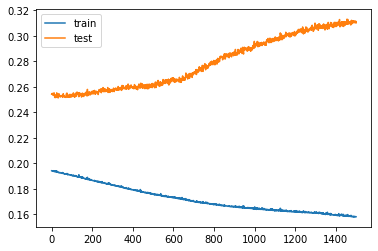

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

 <b>(c)Implement a function to draw decision boundary based on training dataset between two classes.</b><br>

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


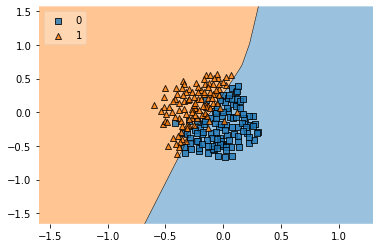

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = model, legend = 2)

In [15]:
import numpy as np
weights = model.get_weights()
np.max(weights[0])


2.0166342

In [16]:
np.max(weights[1])

0.62905836

 <b>(d)Implement L2 and dropout regularization and tune the hyper-parameters to get higher test accuracy.</b>

<b>L2 Regularization</b>

In [17]:
#Regularized Model
reg_model = Sequential()
reg_model.add(Dense(500, input_dim=2, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [18]:
reg_history = reg_model.fit(train_X.T, train_y.T, 
                            validation_data=(test_X.T, test_y.T), 
                            epochs=1500, verbose=1)

Epoch 1/1500
7/7 [==============================] - 1s 36ms/step - loss: 0.7360 - accuracy: 0.7156 - val_loss: 0.7112 - val_accuracy: 0.8300
Epoch 2/1500
7/7 [==============================] - 0s 8ms/step - loss: 0.7022 - accuracy: 0.8152 - val_loss: 0.6764 - val_accuracy: 0.8350
Epoch 3/1500
7/7 [==============================] - 0s 11ms/step - loss: 0.6733 - accuracy: 0.8294 - val_loss: 0.6484 - val_accuracy: 0.8350
Epoch 4/1500
7/7 [==============================] - 0s 10ms/step - loss: 0.6494 - accuracy: 0.8294 - val_loss: 0.6224 - val_accuracy: 0.8300
Epoch 5/1500
7/7 [==============================] - 0s 9ms/step - loss: 0.6270 - accuracy: 0.8389 - val_loss: 0.5996 - val_accuracy: 0.8300
Epoch 6/1500
7/7 [==============================] - 0s 11ms/step - loss: 0.6072 - accuracy: 0.8389 - val_loss: 0.5782 - val_accuracy: 0.8300
Epoch 7/1500
7/7 [==============================] - 0s 10ms/step - loss: 0.5881 - accuracy: 0.8389 - val_loss: 0.5590 - val_accuracy: 0.8300
Epoch 8/1500
7/

In [19]:
# evaluate the keras model
_, accuracy = reg_model.evaluate(train_X.T, train_y.T)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.9005
Accuracy: 90.05


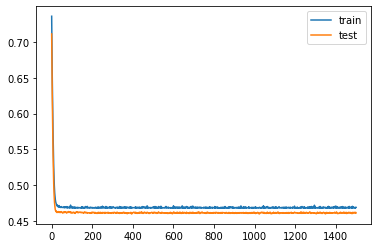

In [21]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


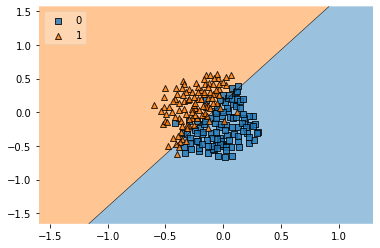

In [22]:
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = reg_model, legend = 2)
plt.show()

<b>Dropout Regularization</b>

In [37]:
from keras.constraints import maxnorm
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import RMSprop
DT_model = Sequential()
DT_model.add(Dense(60, input_dim=2, activation='relu', kernel_constraint=maxnorm(3)))
DT_model.add(Dropout(0.5))
DT_model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
DT_model.add(Dropout(0.5))
DT_model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1, momentum=0.9)
DT_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
DT_history = DT_model.fit(train_X.T, train_y.T, 
                            validation_data=(test_X.T, test_y.T), 
                            epochs=1500, verbose=0)

In [39]:
# evaluate the keras model
_, accuracy = DT_model.evaluate(train_X.T, train_y.T)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9336
Accuracy: 93.36


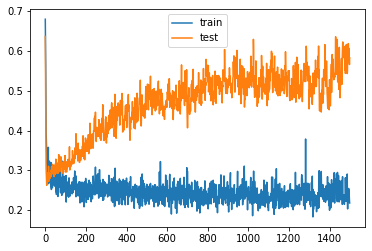

In [40]:
plt.plot(DT_history.history['loss'], label='train')
plt.plot(DT_history.history['val_loss'], label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


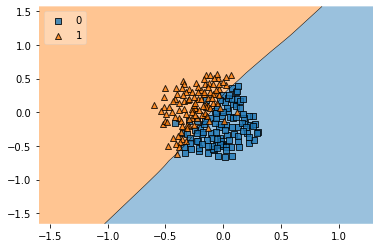

In [41]:
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = DT_model, legend = 2)
plt.show()

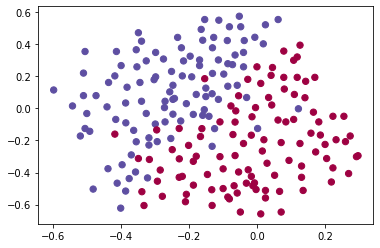

In [42]:
plt.scatter(train_X[0, :], train_X[1, :], c=train_y[0, :], s=40, cmap=plt.cm.Spectral);

<b>(e)Compare the decision boundaries between non-regularization and each regularization.</b>


<b>Non-regularization</b><br>
<b>Accuracy: 94.79% </b><br>

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


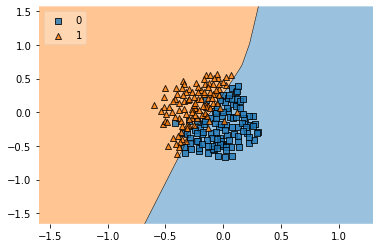

In [20]:
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = model, legend = 2)

<b>L2 Regularization</b><br>
<b>Accuracy : 90.05% </b>

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


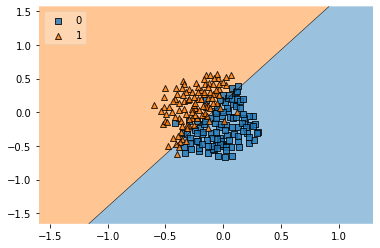

In [23]:
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = reg_model, legend = 2)
plt.show()

<b>Dropout Regularization</b><br>
<b>Accuracy : 93.36%</b>

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


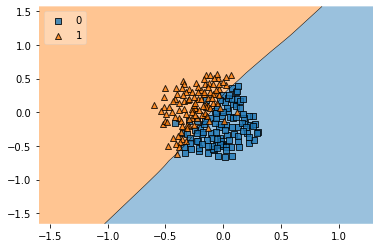

In [43]:
plot_decision_regions(train_X.T, train_y.T.ravel(), clf = DT_model, legend = 2)
plt.show()

<b>Conclusion: </b>Amongst L2 and Dropout, Dropout Regularisation gives best performance and model fits accurately when the hyperparameter dropout rate is tune to 0.5